In [1]:
import numpy as np
import pandas as pd

In [4]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
courses = pd.read_csv('Coursera_courses.csv', encoding='utf8', sep=',', skipinitialspace=True) #reading the dataset 1
reviews = pd.read_csv('Coursera_reviews.csv', encoding='utf8', sep=',', skipinitialspace=True) #reading the dataset 2

In [6]:
# Merge the reviews and courses DataFrames on 'course_id'
df = pd.merge(reviews, courses, on='course_id') 

# Drop the 'course_url' column
df = df.drop('course_url', axis=1)

# Display the first eleven rows of the DataFrame
df.head(11)

,reviews,reviewers,date_reviews,rating,course_id,name,institution
0,"Pretty dry, but I was able to pass with just t...",By Robert S,"Feb 12, 2020",4,google-cbrs-cpi-training,Become a CBRS Certified Professional Installer...,Google - Spectrum Sharing
1,would be a better experience if the video and ...,By Gabriel E R,"Sep 28, 2020",4,google-cbrs-cpi-training,Become a CBRS Certified Professional Installer...,Google - Spectrum Sharing
2,Information was perfect! The program itself wa...,By Jacob D,"Apr 08, 2020",4,google-cbrs-cpi-training,Become a CBRS Certified Professional Installer...,Google - Spectrum Sharing
3,A few grammatical mistakes on test made me do ...,By Dale B,"Feb 24, 2020",4,google-cbrs-cpi-training,Become a CBRS Certified Professional Installer...,Google - Spectrum Sharing
4,Excellent course and the training provided was...,By Sean G,"Jun 18, 2020",4,google-cbrs-cpi-training,Become a CBRS Certified Professional Installer...,Google - Spectrum Sharing
5,Some of the quizzes contained material not exp...,By Daniel F,"Dec 23, 2019",4,google-cbrs-cpi-training,Become a CBRS Certified Professional Installer...,Google - Spectrum Sharing
6,Solid presentation all the way through. I real...,By Logan D,"Sep 03, 2020",5,google-cbrs-cpi-training,Become a CBRS Certified Professional Installer...,Google - Spectrum Sharing
7,Probably the best certification course I've ta...,By Luis M C,"Nov 21, 2019",5,google-cbrs-cpi-training,Become a CBRS Certified Professional Installer...,Google - Spectrum Sharing
8,The ProctorU.com system took 2 times the amoun...,By scott w,"Sep 28, 2020",5,google-cbrs-cpi-training,Become a CBRS Certified Professional Installer...,Google - Spectrum Sharing
9,Covered all of the required information in an ...,By Ryan H,"Aug 26, 2019",5,google-cbrs-cpi-training,Become a CBRS Certified Professional Installer...,Google - Spectrum Sharing


In [7]:
# Check for missing values
missing = df.isnull().sum()
print(missing)

reviews         153
reviewers         0
date_reviews      0
rating            0
course_id         0
name              0
institution       0
dtype: int64


In [8]:
# Drop rows where 'reviews' or 'rating' are missing
df_cleaned = df.dropna(subset=['reviews', 'rating'])
# 2. Remove Duplicates
df_cleaned = df_cleaned.drop_duplicates()
# Ensure ratings are within the expected range (1 to 5)
df_cleaned = df_cleaned[df_cleaned['rating'].between(1, 5)]
df_cleaned.head()

,reviews,reviewers,date_reviews,rating,course_id,name,institution
0,"Pretty dry, but I was able to pass with just t...",By Robert S,"Feb 12, 2020",4,google-cbrs-cpi-training,Become a CBRS Certified Professional Installer...,Google - Spectrum Sharing
1,would be a better experience if the video and ...,By Gabriel E R,"Sep 28, 2020",4,google-cbrs-cpi-training,Become a CBRS Certified Professional Installer...,Google - Spectrum Sharing
2,Information was perfect! The program itself wa...,By Jacob D,"Apr 08, 2020",4,google-cbrs-cpi-training,Become a CBRS Certified Professional Installer...,Google - Spectrum Sharing
3,A few grammatical mistakes on test made me do ...,By Dale B,"Feb 24, 2020",4,google-cbrs-cpi-training,Become a CBRS Certified Professional Installer...,Google - Spectrum Sharing
4,Excellent course and the training provided was...,By Sean G,"Jun 18, 2020",4,google-cbrs-cpi-training,Become a CBRS Certified Professional Installer...,Google - Spectrum Sharing


In [9]:
import re
import nltk
import spacy
# Initialize spaCy model for lemmatization
nlp = spacy.load('en_core_web_sm')
# Function to clean text
def clean_text(text):
    # Remove HTML tags
    text = re.sub(r'<.*?>', '', text)
    # Remove special characters and punctuation
    text = re.sub(r'[^\w\s]', '', text)
    # Convert text to lowercase
    text = text.lower()
    return text
# Function to tokenize text
def tokenize_text(text):
    return text.split()
# Function to remove stop words
def remove_stop_words(tokens):
    stop_words = set(nltk.corpus.stopwords.words('english'))
    return [word for word in tokens if word not in stop_words]
# Function to lemmatize text
def lemmatize_text(text):
    doc = nlp(text)
    return ' '.join([token.lemma_ for token in doc])

# Apply text cleaning, tokenization, stop words removal, and lemmatization
def preprocess_text(text):
    text = clean_text(text)
    tokens = tokenize_text(text)
    tokens = remove_stop_words(tokens)
    text = ' '.join(tokens)
    text = lemmatize_text(text)
    return text
# Apply preprocessing to the 'reviews' column
df_cleaned['cleaned_reviews'] = df_cleaned['reviews'].apply(preprocess_text)

In [10]:
df_cleaned.head()

,reviews,reviewers,date_reviews,rating,course_id,name,institution,cleaned_reviews
0,"Pretty dry, but I was able to pass with just t...",By Robert S,"Feb 12, 2020",4,google-cbrs-cpi-training,Become a CBRS Certified Professional Installer...,Google - Spectrum Sharing,pretty dry able pass two complete watch I m ha...
1,would be a better experience if the video and ...,By Gabriel E R,"Sep 28, 2020",4,google-cbrs-cpi-training,Become a CBRS Certified Professional Installer...,Google - Spectrum Sharing,would well experience video screen shot would ...
2,Information was perfect! The program itself wa...,By Jacob D,"Apr 08, 2020",4,google-cbrs-cpi-training,Become a CBRS Certified Professional Installer...,Google - Spectrum Sharing,information perfect program little annoying wa...
3,A few grammatical mistakes on test made me do ...,By Dale B,"Feb 24, 2020",4,google-cbrs-cpi-training,Become a CBRS Certified Professional Installer...,Google - Spectrum Sharing,grammatical mistake test make double take bad
4,Excellent course and the training provided was...,By Sean G,"Jun 18, 2020",4,google-cbrs-cpi-training,Become a CBRS Certified Professional Installer...,Google - Spectrum Sharing,excellent course training provide detailed eas...


In [15]:
df_cleaned['date_reviews'] = pd.to_datetime(df_cleaned['date_reviews'])

# Verify the conversion by checking the data types
print(df_cleaned['date_reviews'].dtypes)

datetime64[ns]


In [16]:
df_cleaned.head()

,reviews,reviewers,date_reviews,rating,course_id,name,institution,cleaned_reviews
0,"Pretty dry, but I was able to pass with just t...",By Robert S,2020-02-12,4,google-cbrs-cpi-training,Become a CBRS Certified Professional Installer...,Google - Spectrum Sharing,pretty dry able pass two complete watch I m ha...
1,would be a better experience if the video and ...,By Gabriel E R,2020-09-28,4,google-cbrs-cpi-training,Become a CBRS Certified Professional Installer...,Google - Spectrum Sharing,would well experience video screen shot would ...
2,Information was perfect! The program itself wa...,By Jacob D,2020-04-08,4,google-cbrs-cpi-training,Become a CBRS Certified Professional Installer...,Google - Spectrum Sharing,information perfect program little annoying wa...
3,A few grammatical mistakes on test made me do ...,By Dale B,2020-02-24,4,google-cbrs-cpi-training,Become a CBRS Certified Professional Installer...,Google - Spectrum Sharing,grammatical mistake test make double take bad
4,Excellent course and the training provided was...,By Sean G,2020-06-18,4,google-cbrs-cpi-training,Become a CBRS Certified Professional Installer...,Google - Spectrum Sharing,excellent course training provide detailed eas...


In [17]:
df_cleaned['year'] = df_cleaned['date_reviews'].dt.year
df_cleaned['month'] = df_cleaned['date_reviews'].dt.month
df_cleaned['day'] = df_cleaned['date_reviews'].dt.day

In [18]:
df_cleaned.head()

,reviews,reviewers,date_reviews,rating,course_id,name,institution,cleaned_reviews,year,month,day
0,"Pretty dry, but I was able to pass with just t...",By Robert S,2020-02-12,4,google-cbrs-cpi-training,Become a CBRS Certified Professional Installer...,Google - Spectrum Sharing,pretty dry able pass two complete watch I m ha...,2020,2,12
1,would be a better experience if the video and ...,By Gabriel E R,2020-09-28,4,google-cbrs-cpi-training,Become a CBRS Certified Professional Installer...,Google - Spectrum Sharing,would well experience video screen shot would ...,2020,9,28
2,Information was perfect! The program itself wa...,By Jacob D,2020-04-08,4,google-cbrs-cpi-training,Become a CBRS Certified Professional Installer...,Google - Spectrum Sharing,information perfect program little annoying wa...,2020,4,8
3,A few grammatical mistakes on test made me do ...,By Dale B,2020-02-24,4,google-cbrs-cpi-training,Become a CBRS Certified Professional Installer...,Google - Spectrum Sharing,grammatical mistake test make double take bad,2020,2,24
4,Excellent course and the training provided was...,By Sean G,2020-06-18,4,google-cbrs-cpi-training,Become a CBRS Certified Professional Installer...,Google - Spectrum Sharing,excellent course training provide detailed eas...,2020,6,18


In [19]:
import calendar
# Function to convert month number to month name
def month_number_to_name(month_num):
    return calendar.month_name[month_num]

# Apply the function to create a new column with month names
df_cleaned['month_name'] = df_cleaned['month'].apply(month_number_to_name)

In [20]:
df_cleaned.head()

,reviews,reviewers,date_reviews,rating,course_id,name,institution,cleaned_reviews,year,month,day,month_name
0,"Pretty dry, but I was able to pass with just t...",By Robert S,2020-02-12,4,google-cbrs-cpi-training,Become a CBRS Certified Professional Installer...,Google - Spectrum Sharing,pretty dry able pass two complete watch I m ha...,2020,2,12,February
1,would be a better experience if the video and ...,By Gabriel E R,2020-09-28,4,google-cbrs-cpi-training,Become a CBRS Certified Professional Installer...,Google - Spectrum Sharing,would well experience video screen shot would ...,2020,9,28,September
2,Information was perfect! The program itself wa...,By Jacob D,2020-04-08,4,google-cbrs-cpi-training,Become a CBRS Certified Professional Installer...,Google - Spectrum Sharing,information perfect program little annoying wa...,2020,4,8,April
3,A few grammatical mistakes on test made me do ...,By Dale B,2020-02-24,4,google-cbrs-cpi-training,Become a CBRS Certified Professional Installer...,Google - Spectrum Sharing,grammatical mistake test make double take bad,2020,2,24,February
4,Excellent course and the training provided was...,By Sean G,2020-06-18,4,google-cbrs-cpi-training,Become a CBRS Certified Professional Installer...,Google - Spectrum Sharing,excellent course training provide detailed eas...,2020,6,18,June


In [ ]:
EXPLORATORY DATA ANALYSIS

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [22]:
# Verifying for missing values
missing_summary = df_cleaned.isnull().sum()
print(missing_summary)

reviews            0
reviewers          0
date_reviews       0
rating             0
course_id          0
name               0
institution        0
cleaned_reviews    0
year               0
month              0
day                0
month_name         0
dtype: int64


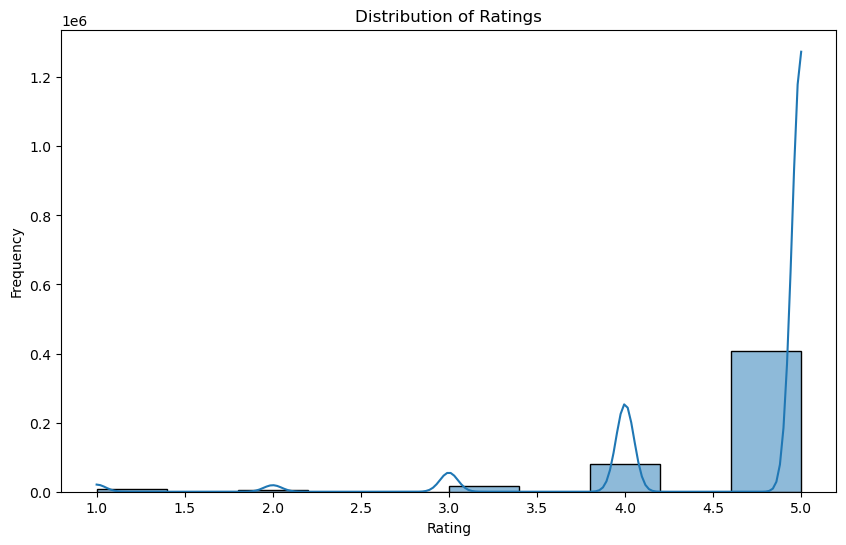

In [23]:
plt.figure(figsize=(10, 6))
sns.histplot(df_cleaned['rating'], bins=10, kde=True)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

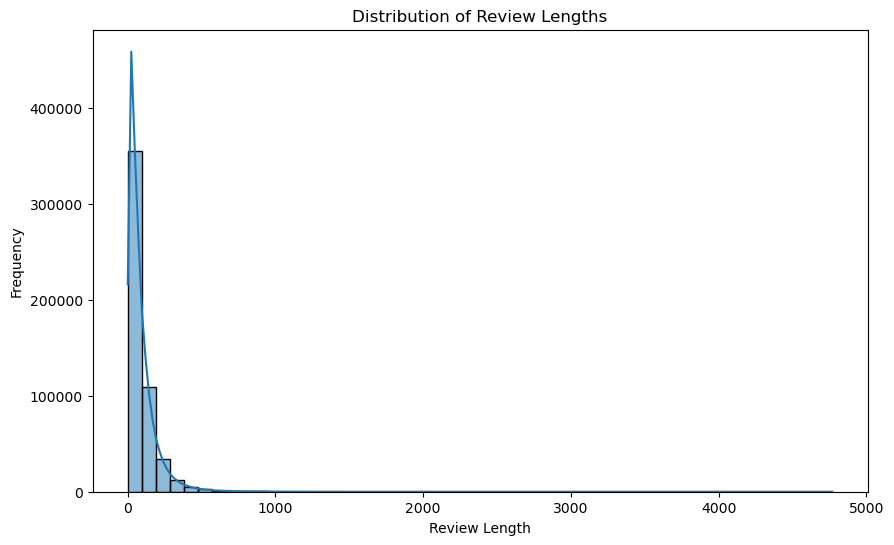

In [24]:
df_cleaned['review_length'] = df_cleaned['cleaned_reviews'].apply(len)
plt.figure(figsize=(10, 6))
sns.histplot(df_cleaned['review_length'], bins=50, kde=True)
plt.title('Distribution of Review Lengths')
plt.xlabel('Review Length')
plt.ylabel('Frequency')
plt.show()

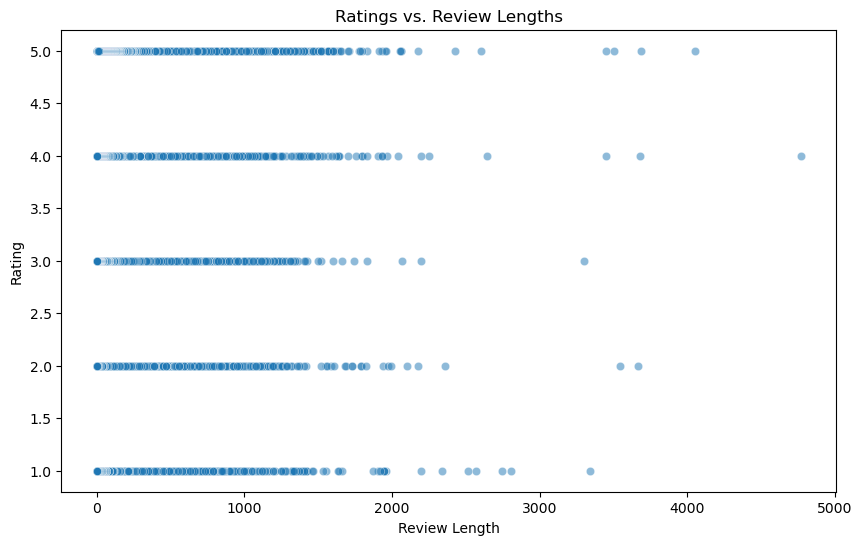

In [25]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_cleaned, x='review_length', y='rating', alpha=0.5)
plt.title('Ratings vs. Review Lengths')
plt.xlabel('Review Length')
plt.ylabel('Rating')
plt.show()

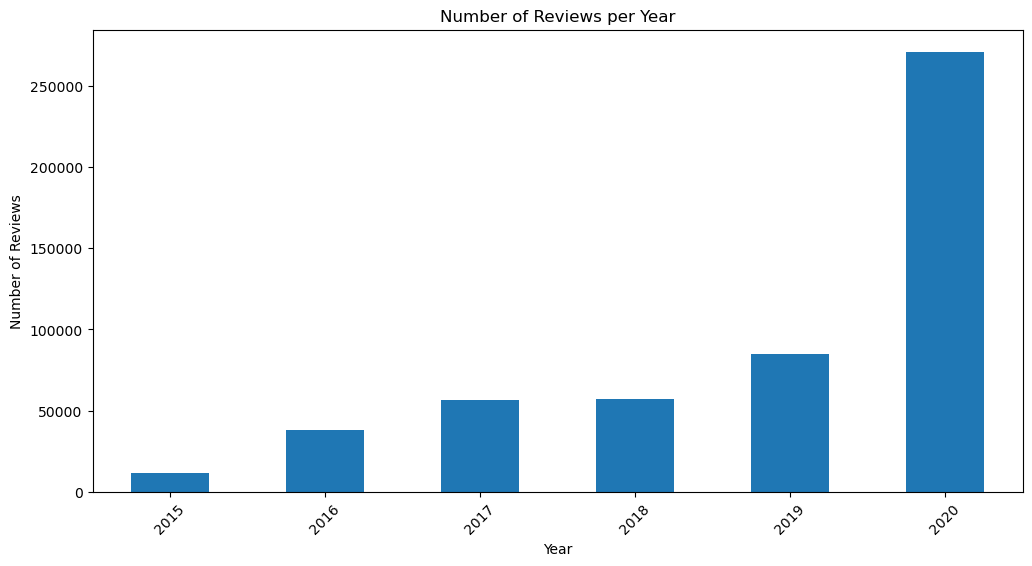

In [26]:
# Group by year and count the number of reviews
reviews_per_year = df_cleaned.groupby('year').size()
plt.figure(figsize=(12, 6))
reviews_per_year.plot(kind='bar')
plt.title('Number of Reviews per Year')
plt.xlabel('Year')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=45)
plt.show()

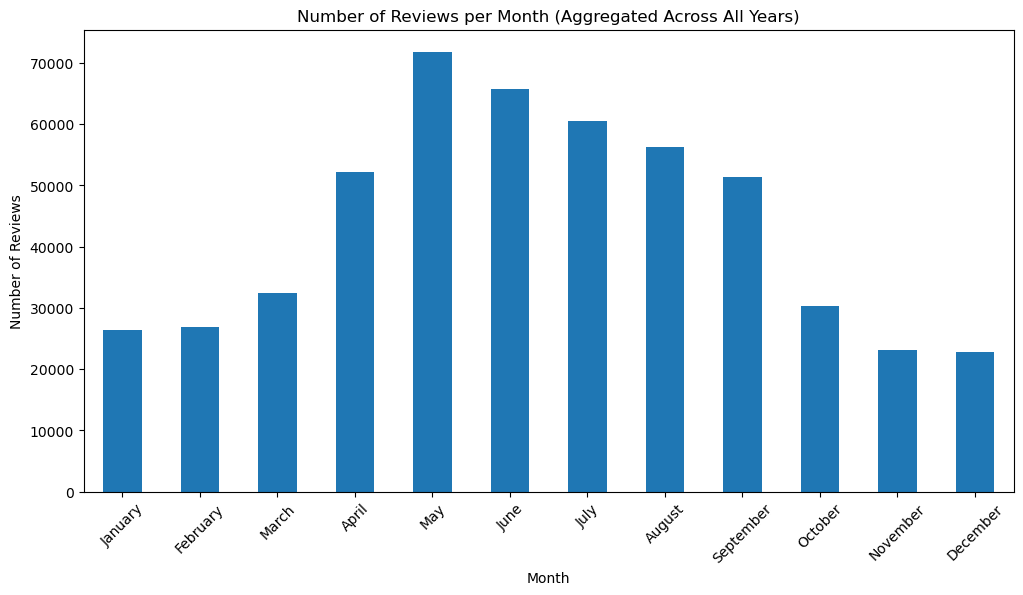

In [27]:
# Group by month and count the number of reviews
reviews_per_month = df_cleaned.groupby('month_name').size()

# Sort months in the correct order
months_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
reviews_per_month = reviews_per_month.reindex(months_order)

plt.figure(figsize=(12, 6))
reviews_per_month.plot(kind='bar')
plt.title('Number of Reviews per Month (Aggregated Across All Years)')
plt.xlabel('Month')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=45)
plt.show()


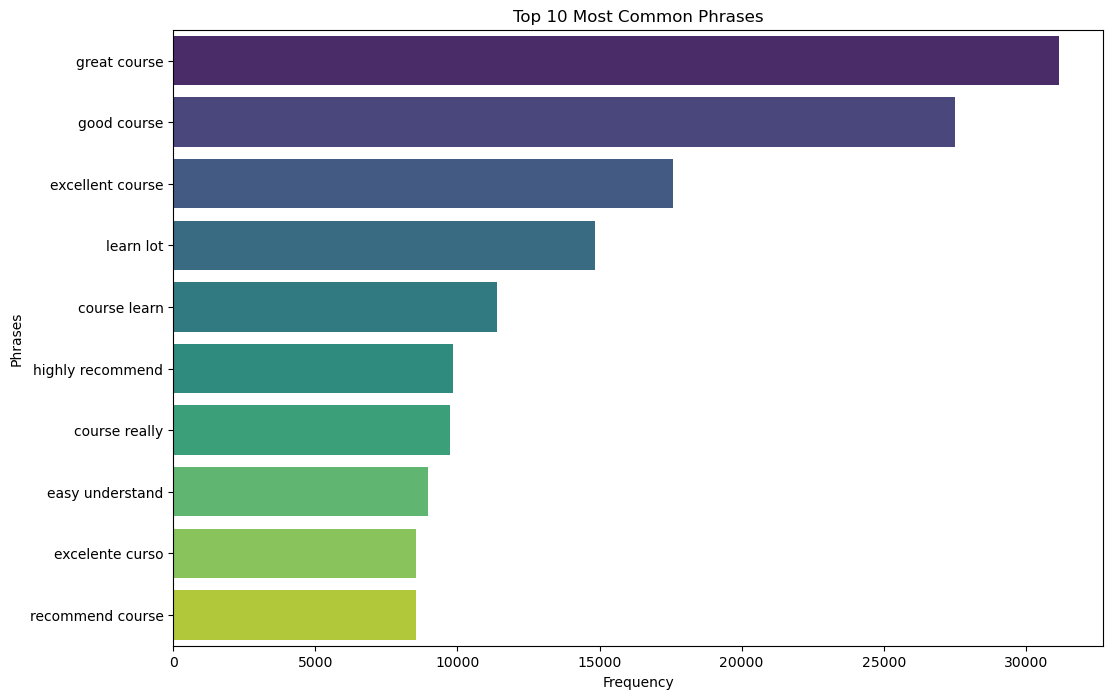

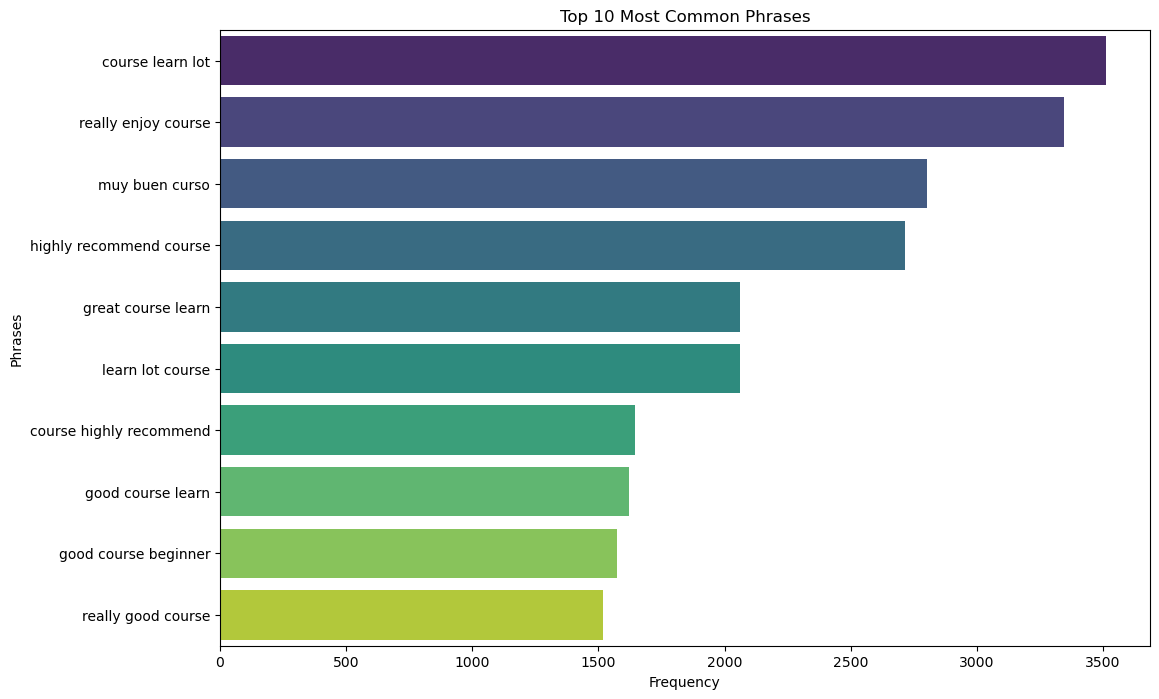

In [28]:
import nltk
from sklearn.feature_extraction.text import CountVectorizer

# Function to plot top n-grams
def plot_top_ngrams(corpus, ngram_range=(2, 2), n=10):
    vec = CountVectorizer(ngram_range=ngram_range, stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    common_words = words_freq[:n]
    
    common_words_df = pd.DataFrame(common_words, columns=['Phrase', 'Frequency'])
    
    # Plotting
    plt.figure(figsize=(12, 8))
    sns.barplot(x='Frequency', y='Phrase', data=common_words_df, palette='viridis')
    plt.title('Top 10 Most Common Phrases')
    plt.xlabel('Frequency')
    plt.ylabel('Phrases')
    plt.show()

# Plot top 10 bi-grams
plot_top_ngrams(df_cleaned['cleaned_reviews'], ngram_range=(2, 2), n=10)

# Plot top 10 tri-grams
plot_top_ngrams(df_cleaned['cleaned_reviews'], ngram_range=(3, 3), n=10)

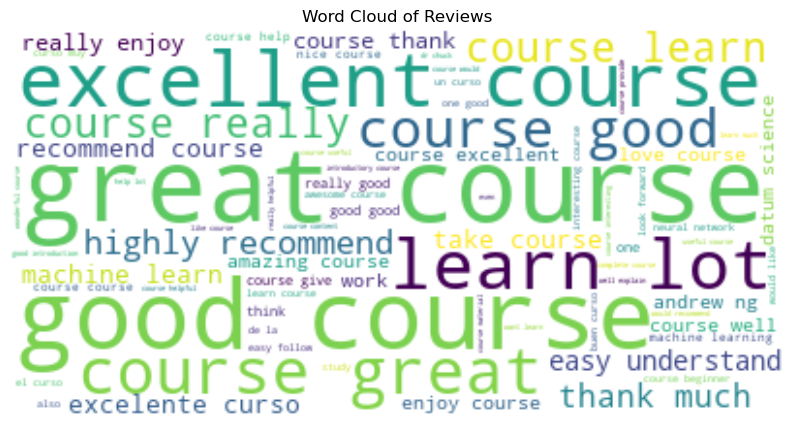

In [29]:
text = ' '.join(df_cleaned['cleaned_reviews'].dropna())
wordcloud = WordCloud(stopwords=nltk.corpus.stopwords.words('english'), background_color='white').generate(text)

plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Reviews')
plt.show()

In [30]:
course_names = df_cleaned['name'].unique()

In [31]:
def perfect_rating_ratio(course_name):
    course_reviews = df_cleaned[df_cleaned['name'] == course_name]
    perfect_ratings = course_reviews[course_reviews['rating'] == 5].shape[0]
    total_reviews = course_reviews.shape[0]
    if total_reviews == 0:
        return 0  # Avoid division by zero
    return perfect_ratings / total_reviews
def myFunc(item):
    return item['ratio']
ratios = []

for name in course_names:
    ratios.append({"course": name, 'ratio': perfect_rating_ratio(name)})

ratios.sort(reverse=True, key=myFunc)

# Display the sorted ratios
for item in ratios:
    print(f"Course: {item['course']}, Perfect Rating Ratio: {item['ratio']:.2f}")

Course: How to Manage a Remote Team, Perfect Rating Ratio: 1.00
Course: Entreprise et changement climatique, Perfect Rating Ratio: 1.00
Course: Building Modern Python Applications on AWS, Perfect Rating Ratio: 1.00
Course: Removing Barriers to Change, Perfect Rating Ratio: 1.00
Course: El Abogado del Futuro: Legaltech y la Transformación Digital del Derecho, Perfect Rating Ratio: 0.97
Course: Bugs 101: Insect-Human Interactions, Perfect Rating Ratio: 0.96
Course: Build a Modern Computer from First Principles: Nand to Tetris Part II (project-centered course), Perfect Rating Ratio: 0.96
Course: Everyday Excel, Part 2, Perfect Rating Ratio: 0.95
Course: Everyday Parenting: The ABCs of Child Rearing, Perfect Rating Ratio: 0.95
Course: The Science of Well-Being, Perfect Rating Ratio: 0.95
Course: Medical Neuroscience, Perfect Rating Ratio: 0.95
Course: Programming Languages, Part A, Perfect Rating Ratio: 0.94
Course: In the Studio: Postwar Abstract Painting, Perfect Rating Ratio: 0.94
Cours

In [ ]:
VADER SENTIMENT

In [32]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [35]:
analyzer = SentimentIntensityAnalyzer()
# Define a function to get sentiment score
def get_sentiment(text):
    sentiment = analyzer.polarity_scores(text)
    return sentiment
df_cleaned['cleaned_reviews']=df_cleaned['cleaned_reviews'].astype(str)

In [39]:
# Apply sentiment analysis to each review
df_cleaned['sentiment'] = df_cleaned['cleaned_reviews'].apply(get_sentiment)

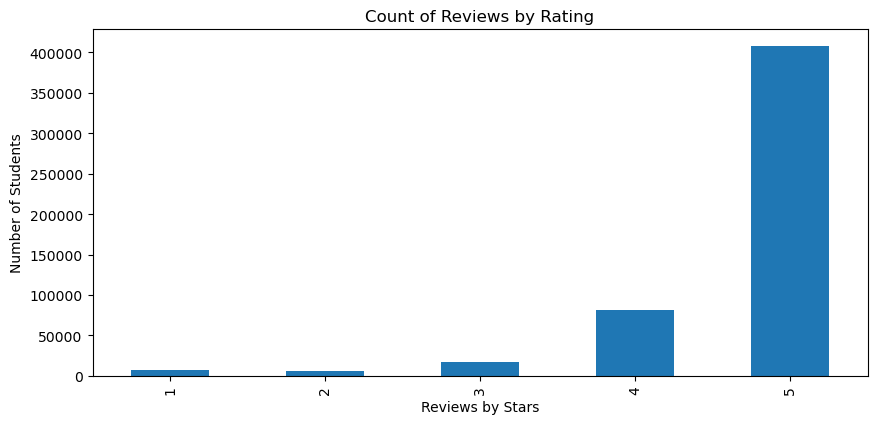

In [37]:
ax = df_cleaned['rating'].value_counts().sort_index().plot(kind='bar', title='Count of Reviews by Rating', figsize=(10, 4.5))
ax.set_xlabel('Reviews by Stars')
ax.set_ylabel('Number of Students')
plt.show()

In [40]:
df_cleaned['compound'] = df_cleaned['sentiment'].apply(lambda x: x['compound'])
df_cleaned['sentiment_category'] = df_cleaned['compound'].apply(
    lambda x: 'positive' if x > 0.05 else ('negative' if x < -0.05 else 'neutral')
)

In [41]:
df_cleaned['compound'].describe()

count    519886.000000
mean          0.528195
std           0.341365
min          -0.991500
25%           0.381800
50%           0.624900
75%           0.802000
max           0.999900
Name: compound, dtype: float64

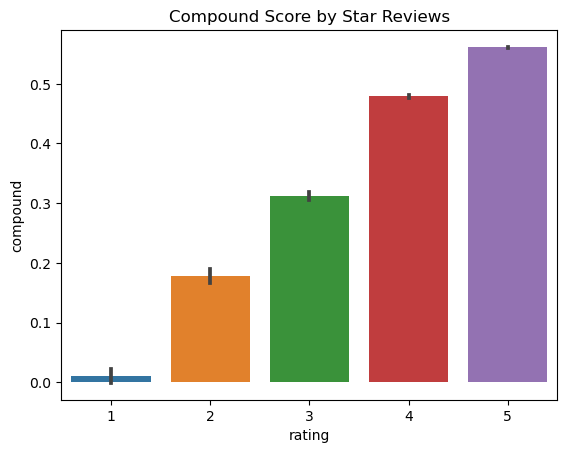

In [42]:
ax = sns.barplot(data=df_cleaned, x='rating', y='compound')
ax.set_title('Compound Score by Star Reviews')
plt.show()

In [43]:
df_cleaned['sentiment_category'].describe()

count       519886
unique           3
top       positive
freq        424300
Name: sentiment_category, dtype: object

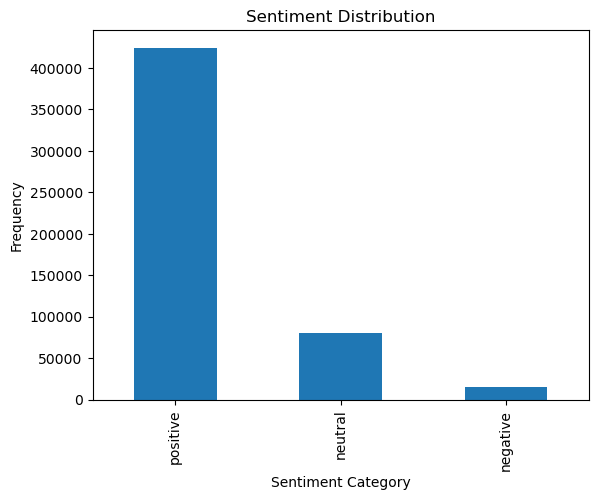

In [44]:
# Plot the distribution of sentiment categories
df_cleaned['sentiment_category'].value_counts().plot(kind='bar')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment Category')
plt.ylabel('Frequency')
plt.show()

In [45]:
from nltk.sentiment import SentimentIntensityAnalyzer 

In [46]:
sia = SentimentIntensityAnalyzer()
sia

In [47]:
df_cleaned['cleaned_reviews']=df_cleaned['cleaned_reviews'].astype(str)

df_cleaned['compound'] = [sia.polarity_scores(review)['compound'] for review in df_cleaned['cleaned_reviews']]

df_cleaned['neg'] = [sia.polarity_scores(review)['neg'] for review in df_cleaned['cleaned_reviews']]

df_cleaned['neu'] = [sia.polarity_scores(review)['neu'] for review in df_cleaned['cleaned_reviews']]

df_cleaned['pos'] = [sia.polarity_scores(review)['pos'] for review in df_cleaned['cleaned_reviews']]

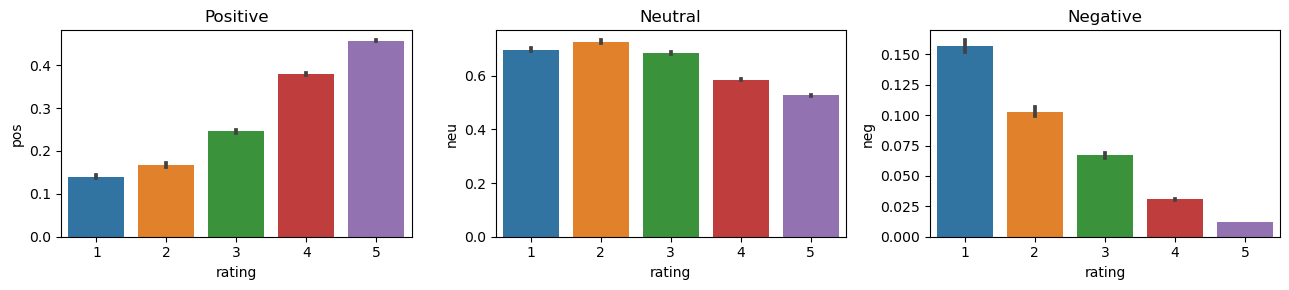

In [48]:
fig, axs = plt.subplots(1, 3, figsize=(13, 3))
sns.barplot(data=df_cleaned, x='rating', y='pos', ax = axs[0])
sns.barplot(data=df_cleaned, x='rating', y='neu', ax = axs[1])
sns.barplot(data=df_cleaned, x='rating', y='neg', ax = axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()
plt.show()

<Axes: xlabel='compound', ylabel='Count'>

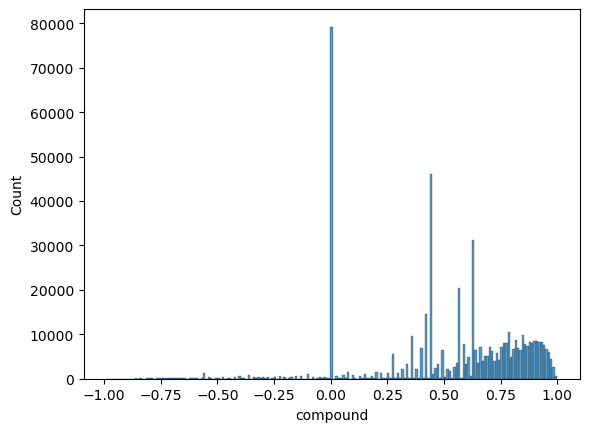

In [49]:
sns.histplot(df_cleaned['compound'])

<Axes: xlabel='pos', ylabel='Count'>

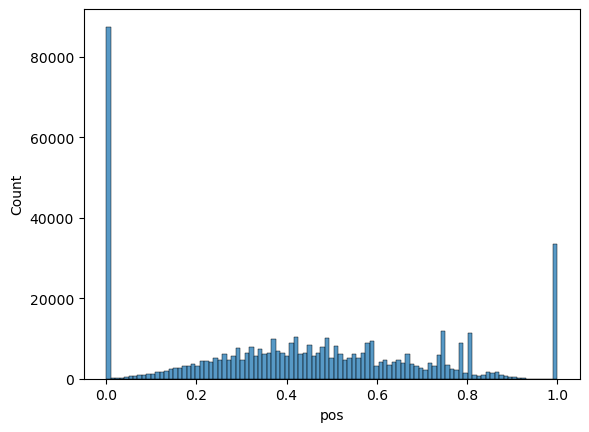

In [50]:
sns.histplot(df_cleaned['pos'])

<Axes: xlabel='neu', ylabel='Count'>

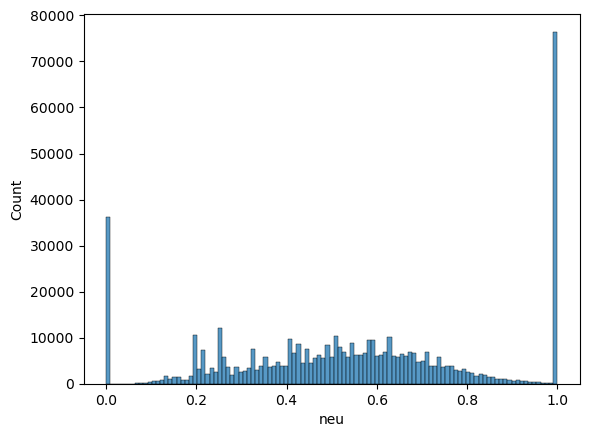

In [51]:
sns.histplot(df_cleaned['neu'])

<Axes: xlabel='neg', ylabel='Count'>

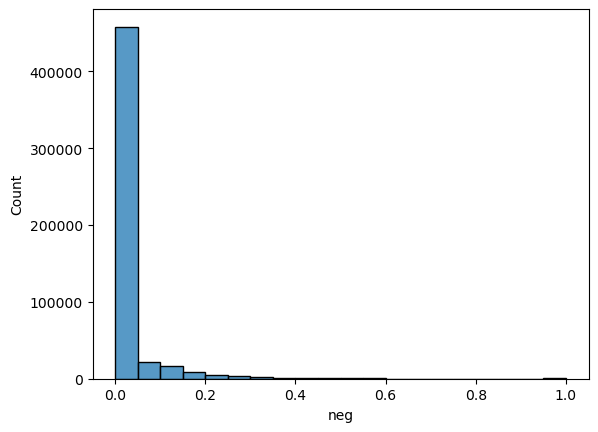

In [52]:
sns.histplot(df_cleaned['neg'])

In [53]:
df_cleaned.columns

Index(['reviews', 'reviewers', 'date_reviews', 'rating', 'course_id', 'name',
       'institution', 'cleaned_reviews', 'year', 'month', 'day', 'month_name',
       'review_length', 'sentiment', 'compound', 'sentiment_category', 'neg',
       'neu', 'pos'],
      dtype='object')

In [54]:
df_cleaned['positive'] = df_cleaned['compound'] > 0.05
df_cleaned['neutral'] = (df_cleaned['compound'] >= -0.05) & (df_cleaned['compound'] <= 0.05)
df_cleaned['negative'] = df_cleaned['compound'] < -0.05

In [55]:
# Group by course_id and sum the boolean values to get counts
positive_counts = df_cleaned.groupby('course_id')['positive'].sum()
neutral_counts = df_cleaned.groupby('course_id')['neutral'].sum()
negative_counts = df_cleaned.groupby('course_id')['negative'].sum()

In [56]:
# Combine the counts into a single DataFrame
sentiment_counts = pd.DataFrame({
    'positive': positive_counts,
    'neutral': neutral_counts,
    'negative': negative_counts
})

In [57]:
sentiment_counts

,positive,neutral,negative
course_id,,,
aboriginal-education,58,6,3
access-control-sscp,34,9,2
accounting-analytics,384,51,33
accounting-data-analytics-python,7,0,1
actualizacion-manejo-diabetes-tipo-2,10,235,8
...,...,...,...
womens-health-human-rights,214,22,6
write-a-feature-length-screenplay-for-film-or-television,27,4,1
write-your-first-novel,15,2,3


In [59]:
percentage_negative = pd.DataFrame((df_cleaned['compound']<=0).groupby(df_cleaned['course_id']).sum()
/df_cleaned['course_id'].groupby(df_cleaned['course_id']).count()*100,
columns=['% negative reviews']).sort_values(by='% negative reviews')

percentage_negative

,% negative reviews
course_id,
the-business-of-product-management-one,0.000000
building-modern-python-applications-on-aws,0.000000
spanish-in-healthcare-settings,0.000000
social-work-practice-advocating-social-justice-and-change,0.000000
fundamental-machine-learning-healthcare,0.000000
...,...
enlinea,94.827586
revisao-sistematica,94.882729
anticorrupcion-introduccion,95.064935


In [60]:
df_cleaned.query('rating==1').sort_values('compound', ascending=False)

,reviews,reviewers,date_reviews,rating,course_id,name,institution,cleaned_reviews,year,month,...,review_length,sentiment,compound,sentiment_category,neg,neu,pos,positive,neutral,negative
98456,I loved the Google IT Support Certificate prog...,By Nancy A,2020-02-16,1,python-crash-course,Crash Course on Python,Google,love google support certificate program look f...,2020,2,...,1403,"{'neg': 0.075, 'neu': 0.61, 'pos': 0.315, 'com...",0.9967,positive,0.076,0.604,0.320,True,False,False
617290,"Good material so far, but full of trashy peopl...",By Francesco R,2020-05-16,1,marketing-digital,Marketing in a Digital World,University of Illinois at Urbana-Champaign,good material far full trashy people take free...,2020,5,...,599,"{'neg': 0.031, 'neu': 0.596, 'pos': 0.373, 'co...",0.9921,positive,0.033,0.576,0.391,True,False,False
1029644,Keeping in mind that this course should introd...,By Andre B,2020-05-05,1,wharton-introduction-spreadsheets-models,Introduction to Spreadsheets and Models,University of Pennsylvania,keep mind course introduce spreadsheet model q...,2020,5,...,1278,"{'neg': 0.014, 'neu': 0.738, 'pos': 0.248, 'co...",0.9906,positive,0.014,0.738,0.248,True,False,False
17439,This Course is bad! I try to ask for help and ...,By Josh M,2016-10-21,1,python,Programming for Everybody (Getting Started wit...,University of Michigan,course bad try ask help mentor reply can not h...,2016,10,...,1342,"{'neg': 0.138, 'neu': 0.567, 'pos': 0.295, 'co...",0.9891,positive,0.142,0.566,0.292,True,False,False
1148967,"For the ""Three good things"" exercise, I got a ...",By Elayne R,2017-06-05,1,positive-psychology-applications,Positive Psychology: Applications and Interven...,University of Pennsylvania,three good thing exercise get fail grade peer ...,2017,6,...,1084,"{'neg': 0.039, 'neu': 0.72, 'pos': 0.241, 'com...",0.9881,positive,0.040,0.732,0.228,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
478855,Terrible and frustrating. My previous knowledg...,By Sara F,2020-01-03,1,sql-for-data-science,SQL for Data Science,"University of California, Davis",terrible frustrating previous knowledge litera...,2020,1,...,384,"{'neg': 0.42, 'neu': 0.472, 'pos': 0.108, 'com...",-0.9752,negative,0.420,0.472,0.108,False,False,True
506992,Most garbage and horrible course I have taken ...,By Eric J,2020-08-20,1,forensic-accounting,Forensic Accounting and Fraud Examination,West Virginia University,garbage horrible course take far accounting fa...,2020,8,...,409,"{'neg': 0.371, 'neu': 0.546, 'pos': 0.082, 'co...",-0.9768,negative,0.395,0.517,0.088,False,False,True
98549,I came to learn about this course because I wa...,By Tawanix,2020-09-28,1,python-crash-course,Crash Course on Python,Google,come learn course want make change career some...,2020,9,...,723,"{'neg': 0.251, 'neu': 0.635, 'pos': 0.114, 'co...",-0.9806,negative,0.296,0.607,0.098,False,False,True
982088,I would like to give this course worse than a ...,By emmanuel g,2017-03-27,1,algorithmic-toolbox,Algorithmic Toolbox,University of California San Diego,would like give course bad 1 star course expla...,2017,3,...,678,"{'neg': 0.346, 'neu': 0.559, 'pos': 0.095, 'co...",-0.9893,negative,0.363,0.556,0.080,False,False,True


In [61]:
sentiment_counts = df_cleaned.groupby('course_id')['sentiment_category'].value_counts().unstack().fillna(0)

In [62]:
# Sort values by their occurrence count
sorted_values = sentiment_counts.sort_values(by=['positive', 'neutral', 'negative'], ascending=False)
sorted_values

sentiment_category,negative,neutral,positive
course_id,,,
python,271.0,996.0,13959.0
machine-learning,288.0,497.0,11892.0
neural-networks-deep-learning,286.0,763.0,11242.0
learning-how-to-learn,244.0,983.0,10644.0
technical-support-fundamentals,226.0,1226.0,10602.0
...,...,...,...
social-economic-networks,0.0,3.0,3.0
curanderismo-plants,3.0,0.0,3.0
epigenetics,3.0,0.0,3.0


In [68]:
# Filter positive and negative reviews subsets for a specific course
course_id = 'python-data'  #  specific course_id interested in

In [69]:
reviews_positive_subset = df_cleaned.loc[(df_cleaned['course_id'] == course_id) & (df_cleaned['compound'] > 0), :]
reviews_negative_subset = df_cleaned.loc[(df_cleaned['course_id'] == course_id) & (df_cleaned['compound'] < 0), :]

In [70]:
reviews_positive_subset

,reviews,reviewers,date_reviews,rating,course_id,name,institution,cleaned_reviews,year,month,...,review_length,sentiment,compound,sentiment_category,neg,neu,pos,positive,neutral,negative
290223,"Instructor, Dr. Chuck, is terrific. However, ...",By Frederik J E,2017-01-24,1,python-data,Python Data Structures,University of Michigan,instructor dr chuck terrific however assignmen...,2017,1,...,225,"{'neg': 0.122, 'neu': 0.635, 'pos': 0.244, 'co...",0.5868,positive,0.122,0.635,0.244,True,False,False
290224,"The introduction is nice, but the problem is...",By Chaobin Y,2017-04-05,1,python-data,Python Data Structures,University of Michigan,introduction nice problem homework design home...,2017,4,...,114,"{'neg': 0.197, 'neu': 0.558, 'pos': 0.245, 'co...",0.2732,positive,0.197,0.558,0.245,True,False,False
290225,No teaching. Just a guy talking. Do the proble...,By Matthew B,2016-03-03,1,python-data,Python Data Structures,University of Michigan,teach guy talk problem set practice need help ...,2016,3,...,182,"{'neg': 0.128, 'neu': 0.727, 'pos': 0.145, 'co...",0.1531,positive,0.128,0.727,0.145,True,False,False
290229,"Excellent teaching, but it's not actually free...",By Rachael W,2017-04-10,1,python-data,Python Data Structures,University of Michigan,excellent teaching actually free must pay orde...,2017,4,...,100,"{'neg': 0.076, 'neu': 0.543, 'pos': 0.38, 'com...",0.7650,positive,0.076,0.543,0.380,True,False,False
290230,Way too easy assignments. Only good for people...,By Martin M,2016-06-23,1,python-data,Python Data Structures,University of Michigan,way easy assignment good people never kind pro...,2016,6,...,67,"{'neg': 0.159, 'neu': 0.401, 'pos': 0.441, 'co...",0.6025,positive,0.159,0.401,0.441,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
323713,Very useful.,By VINAY R,2020-02-04,5,python-data,Python Data Structures,University of Michigan,useful,2020,2,...,6,"{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound...",0.4404,positive,0.000,0.000,1.000,True,False,False
323714,Great Course,By Rushikesh J,2020-01-29,5,python-data,Python Data Structures,University of Michigan,great course,2020,1,...,12,"{'neg': 0.0, 'neu': 0.196, 'pos': 0.804, 'comp...",0.6249,positive,0.000,0.196,0.804,True,False,False
323715,nice lecture,By AVINASH S,2020-01-27,5,python-data,Python Data Structures,University of Michigan,nice lecture,2020,1,...,12,"{'neg': 0.0, 'neu': 0.263, 'pos': 0.737, 'comp...",0.4215,positive,0.000,0.263,0.737,True,False,False
323716,great course,By Md A R,2020-01-26,5,python-data,Python Data Structures,University of Michigan,great course,2020,1,...,12,"{'neg': 0.0, 'neu': 0.196, 'pos': 0.804, 'comp...",0.6249,positive,0.000,0.196,0.804,True,False,False


In [71]:
reviews_negative_subset

,reviews,reviewers,date_reviews,rating,course_id,name,institution,cleaned_reviews,year,month,...,review_length,sentiment,compound,sentiment_category,neg,neu,pos,positive,neutral,negative
290226,Again all the unnecessary talking!!! He talks ...,By Chintan M,2020-04-12,1,python-data,Python Data Structures,University of Michigan,unnecessary talk talk lotttttttttttttttttttt m...,2020,4,...,132,"{'neg': 0.251, 'neu': 0.749, 'pos': 0.0, 'comp...",-0.6560,negative,0.251,0.749,0.000,False,False,True
290227,Horrible TAs. They should all be changed. They...,By Hakan T,2019-12-31,1,python-data,Python Data Structures,University of Michigan,horrible ta change extremely rude annoying,2019,12,...,42,"{'neg': 0.765, 'neu': 0.235, 'pos': 0.0, 'comp...",-0.8680,negative,0.765,0.235,0.000,False,False,True
290231,"Very boring old fashion academic course, i wou...",By Ali M R H,2020-07-05,1,python-data,Python Data Structures,University of Michigan,bore old fashion academic course would not pas...,2020,7,...,82,"{'neg': 0.133, 'neu': 0.867, 'pos': 0.0, 'comp...",-0.2500,negative,0.133,0.867,0.000,False,False,True
290233,Terrible support on this course. I had to drop...,By Colin I,2020-05-21,1,python-data,Python Data Structures,University of Michigan,terrible support course drop horrible assignme...,2020,5,...,58,"{'neg': 0.547, 'neu': 0.126, 'pos': 0.327, 'co...",-0.5423,negative,0.547,0.126,0.327,False,False,True
290234,Poor. Even courses taught in computer science ...,By Faisal C,2017-11-24,1,python-data,Python Data Structures,University of Michigan,poor even course teach computer science develo...,2017,11,...,60,"{'neg': 0.254, 'neu': 0.574, 'pos': 0.172, 'co...",-0.2500,negative,0.254,0.574,0.172,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318560,it was little bit tough,By abhishek k,2020-06-18,5,python-data,Python Data Structures,University of Michigan,little bit tough,2020,6,...,16,"{'neg': 0.379, 'neu': 0.621, 'pos': 0.0, 'comp...",-0.0571,negative,0.379,0.621,0.000,False,False,True
319946,Couldn't be better.,By SARVESH P,2019-07-29,5,python-data,Python Data Structures,University of Michigan,could not well,2019,7,...,14,"{'neg': 0.476, 'neu': 0.524, 'pos': 0.0, 'comp...",-0.2057,negative,0.476,0.524,0.000,False,False,True
320685,This man is Crazy,By Pratham D,2020-08-22,5,python-data,Python Data Structures,University of Michigan,man crazy,2020,8,...,9,"{'neg': 0.706, 'neu': 0.294, 'pos': 0.0, 'comp...",-0.3400,negative,0.706,0.294,0.000,False,False,True
321056,Nothing but Great,By ANIRUDDHA B,2018-07-18,5,python-data,Python Data Structures,University of Michigan,nothing great,2018,7,...,13,"{'neg': 0.767, 'neu': 0.233, 'pos': 0.0, 'comp...",-0.5096,negative,0.767,0.233,0.000,False,False,True


In [72]:
from nltk.tokenize import word_tokenize

In [74]:
# Tokenize the processed review text for negative reviews subset
neg_tokens = [word for review in reviews_negative_subset['cleaned_reviews'] for word in word_tokenize(review)]

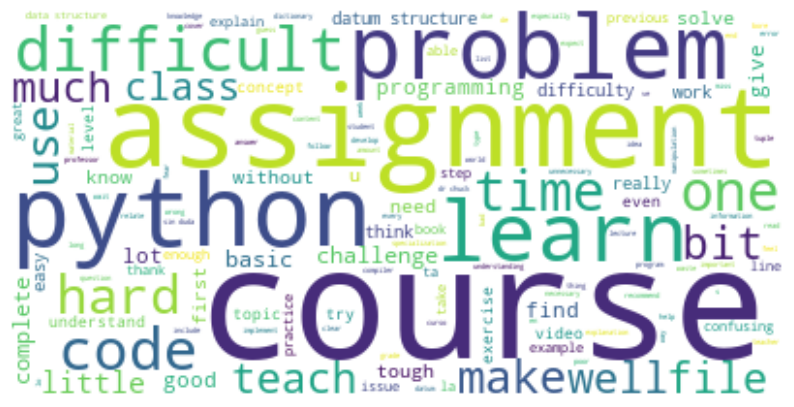

In [75]:
from wordcloud import WordCloud
wc = WordCloud(background_color='white').generate(' '.join(neg_tokens))
plt.figure(figsize=(10, 6))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

In [76]:
# Tokenize the processed review text for positive reviews subset
pos_tokens = [word for review in reviews_positive_subset['cleaned_reviews'] for word in word_tokenize(review)]

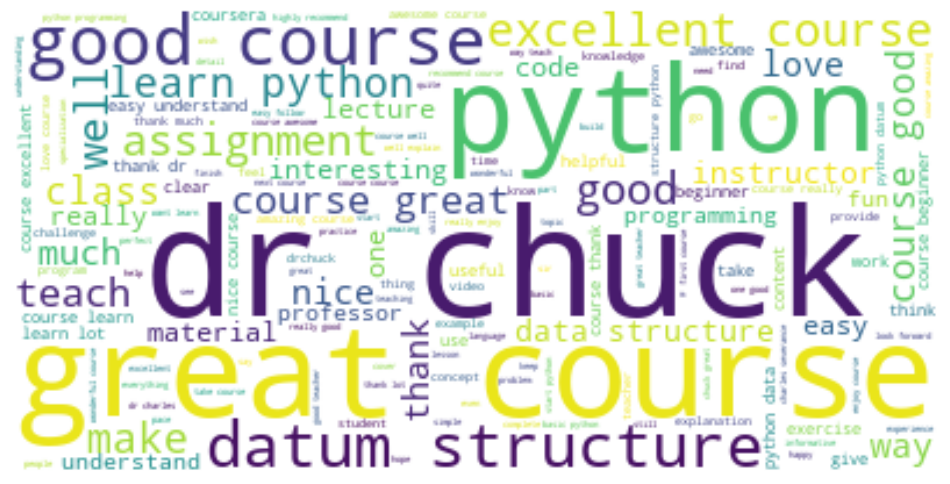

In [77]:
wc = WordCloud(background_color='white').generate(' '.join(pos_tokens))
plt.figure(figsize=(12,12))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
LOGISTICS REGRESSION

In [81]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [78]:
df_cleaned.columns.tolist()

['reviews',
 'reviewers',
 'date_reviews',
 'rating',
 'course_id',
 'name',
 'institution',
 'cleaned_reviews',
 'year',
 'month',
 'day',
 'month_name',
 'review_length',
 'sentiment',
 'compound',
 'sentiment_category',
 'neg',
 'neu',
 'pos',
 'positive',
 'neutral',
 'negative']

In [79]:
# Create the 'sentiment_score' column based on the 'compound' score
def get_sentiment_category(compound):
    if compound >= 0.05:
        return 'positive'
    elif compound <= -0.05:
        return 'negative'
    else:
        return 'neutral'

df_cleaned['sentiment_score'] = df_cleaned['compound'].apply(get_sentiment_category)

In [82]:
# Prepare the data
features = ['review_length', 'neg', 'neu', 'pos', 'compound']
X = df_cleaned[features]
y = df_cleaned['sentiment_score']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Logistic Regression model
logistic_model = LogisticRegression(max_iter=1000)

# Fit the model on the training data
logistic_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [83]:
# Fit the model on the training data
logistic_model.fit(X_train, y_train)

# Predict the sentiment scores on the test data
y_pred = logistic_model.predict(X_test)

# Evaluate the model
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

    negative       0.99      0.97      0.98      3051
     neutral       0.99      1.00      0.99     16099
    positive       1.00      1.00      1.00     84828

    accuracy                           1.00    103978
   macro avg       0.99      0.99      0.99    103978
weighted avg       1.00      1.00      1.00    103978

Confusion Matrix:
 [[ 2948   103     0]
 [   21 16029    49]
 [    0   102 84726]]
Accuracy Score: 0.9973552097559099


In [84]:
y_pred

array(['positive', 'positive', 'positive', ..., 'neutral', 'positive',
       'positive'], dtype=object)

In [85]:
from sklearn.metrics import roc_curve, roc_auc_score, auc
import matplotlib.pyplot as plt

In [89]:
# Binarize the target for binary classification (for ROC curve)
y = (y == 'positive').astype(int)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [91]:
# Initialize and train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [92]:
# Predict probabilities for the test set
y_probs = model.predict_proba(X_test)[:, 1]  # Only taking the probability of the positive class

In [93]:
# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# Calculate AUC (Area Under the Curve)
roc_auc = auc(fpr, tpr)

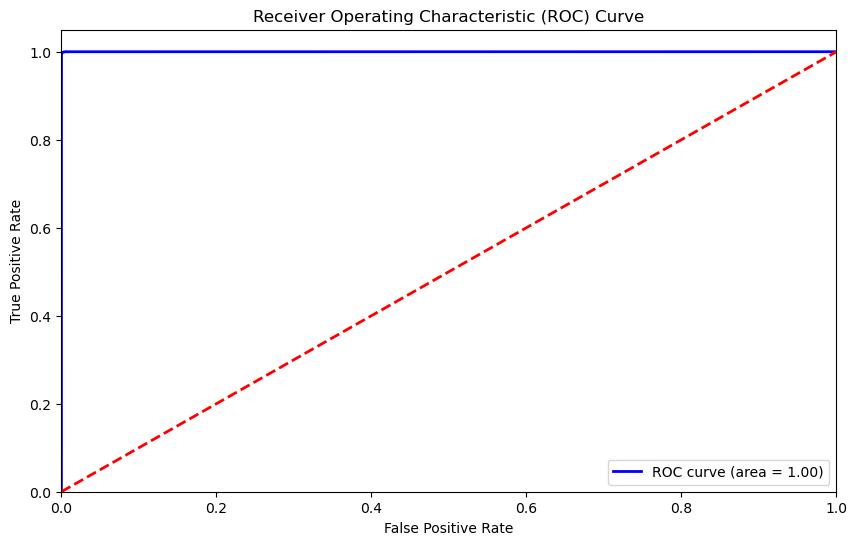

In [94]:
# Plot the ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [ ]:
NAIVES BAYES CLASSIFIER

In [95]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [96]:
# Step 1: Split the dataset into features (X) and target (y)
X = df_cleaned['cleaned_reviews']
y = df_cleaned['sentiment_score'] 

# Step 2: Convert text data into numerical data using CountVectorizer
vectorizer = CountVectorizer()
X_vectorized = vectorizer.fit_transform(X)

In [97]:
# Step 3: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_vectorized, y, test_size=0.2, random_state=42)

# Step 4: Instantiate the Multinomial Naïve Bayes classifier
mnb_classifier = MultinomialNB()

In [98]:
# Step 5: Fit the model on the training data
mnb_classifier.fit(X_train, y_train)

# Step 6: Make predictions on the test data
y_pred = mnb_classifier.predict(X_test)

In [99]:
# Step 7: Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print the results
print(f"Accuracy: {accuracy * 100:.2f}%")
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

Accuracy: 89.78%
Confusion Matrix:
 [[  241   336  2474]
 [  121  9406  6572]
 [  122  1001 83705]]
Classification Report:
               precision    recall  f1-score   support

    negative       0.50      0.08      0.14      3051
     neutral       0.88      0.58      0.70     16099
    positive       0.90      0.99      0.94     84828

    accuracy                           0.90    103978
   macro avg       0.76      0.55      0.59    103978
weighted avg       0.89      0.90      0.88    103978



In [102]:
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

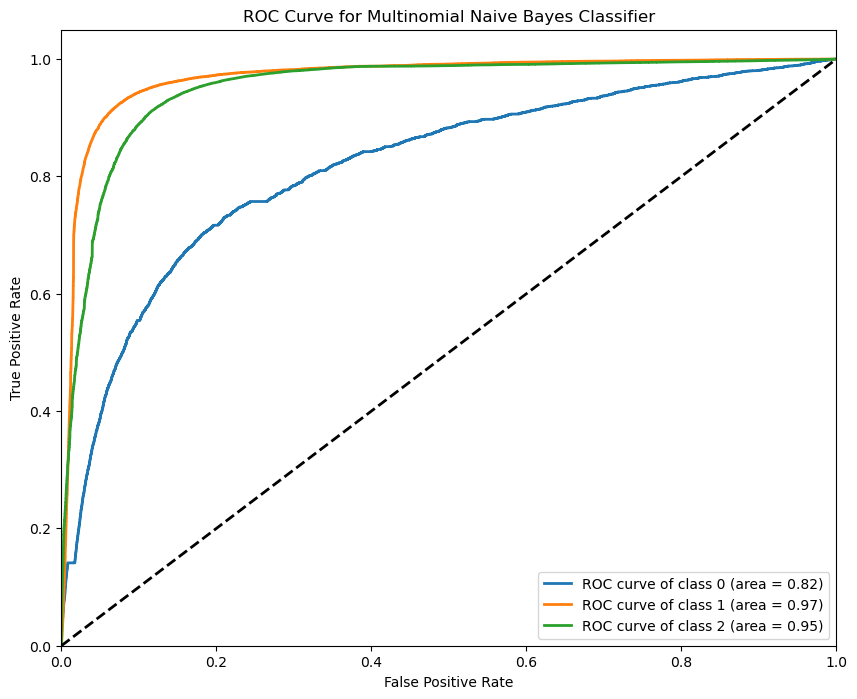

In [103]:
# Convert the sentiment labels to numerical values if they are in string format
# y = LabelEncoder().fit_transform(y)  # Uncomment if 'y' is in string format

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a pipeline that first converts text to TF-IDF features, then applies MNB
pipeline = make_pipeline(TfidfVectorizer(), MultinomialNB())

# Fit the model on the training data
pipeline.fit(X_train, y_train)

# Predict probabilities for the test set
y_score = pipeline.predict_proba(X_test)

# Binarize the output labels (for multi-class ROC)
y_test_bin = label_binarize(y_test, classes=pipeline.classes_)
n_classes = y_test_bin.shape[1]

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot all ROC curves
plt.figure(figsize=(10, 8))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], lw=2,
             label=f'ROC curve of class {i} (area = {roc_auc[i]:0.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Multinomial Naive Bayes Classifier')
plt.legend(loc="lower right")
plt.show()